# D3 Recreating  W E B Du Bois Visualisation
---
### Thirty days of Data Visualisations
JWriggy

Inspired by a [challenge](https://github.com/ajstarks/dubois-data-portraits/tree/master/challenge) to recreate some of Du Bois's classic visualisations.

A fan chart.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The Data
df = pd.read_csv('data/Dubois3.csv')
df.head(2)

,Group,Occupation,Percentage
0,Negroes,"Agriculture, Fisheries and Mining",62.0
1,Negroes,Manufacturing and Mechanical Industries,5.0


In [3]:
# sort both groups according to Negroes list and append a row for blank areas of pie
dat = df.pivot(index='Occupation', columns='Group', values='Percentage').sort_values(by='Negroes')
startangle=40; 
dat.loc['null'] = {'Negroes':200*startangle/(180-2*startangle), 
                                'Whites':200*startangle/(180-2*startangle)}
# back to long format
dat = pd.melt(dat,value_vars=['Negroes','Whites'],value_name='Size',ignore_index=False)
dat.head(2)

,Group,Size
Occupation,,
Professions,Negroes,0.5
Trade and Transportation,Negroes,4.5


In [4]:
# text
title = 'OCCUPATION OF NEGROES AND WHITES IN GEORGIA.'
labels = [p.upper() for p in dat.index.values[:5]]
fan1 = 'NEGROES'
fan2 = 'WHITES'
# style
colors = ['#654321','#d2b48c','#4682b4','#ffd700','#dc143c','#ffffff'] 
h2 = {'fontsize': 8, 'alpha': 0.6,'va':'center', 'family': 'monospace'}

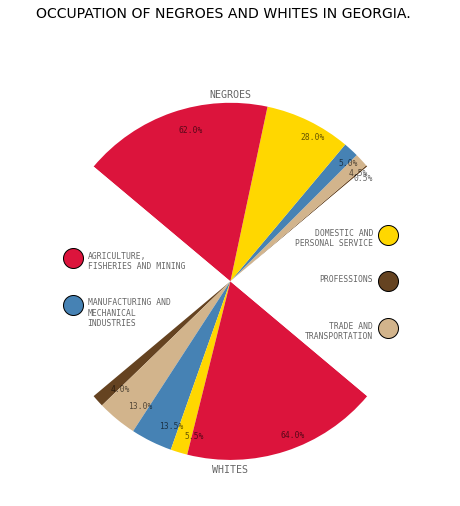

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
ax.axis('equal') 
wedges,txt = ax.pie(dat['Size'], colors=colors+colors, startangle=startangle)

# annotate
# wedges
labelTheta=[w.theta1 + (w.theta2-w.theta1)/2 for w in wedges]
for t,theta,grpPct in list(zip(dat.index.values,labelTheta,dat['Size'])):
    if t != 'null':
        x = .9*np.cos(theta*np.pi/180)
        y = .9*np.sin(theta*np.pi/180)
        ax.text(x,y,str(grpPct)+'%', fontdict=h2)
        
# legend    
x=.88; y=.13; dx=.08; dy=.04
xys = [(x,0),(x,-2*y),(-x,-y),(x,2*y), (-x,y)]
for i,xy in enumerate(xys):
    plt.plot(xy[0], xy[1], "o", color=colors[i],markeredgecolor='k',markersize=20)
    if i in (2,4):
        txt = ax.text(xy[0]+dx, xy[1]+dy, labels[i], fontdict=h2,ha='left', 
                 va='top', wrap=True,bbox=dict(boxstyle='square', fc='none', ec='none'))
    else:
        txt = ax.text(xy[0]-dx, xy[1]+dy, labels[i], fontdict=h2,ha='right', 
                 va='top', wrap=True,bbox=dict(boxstyle='square', fc='none', ec='none'))
    txt._get_wrap_line_width = lambda : 100

# titles
ax.text(0,1.05,fan1, fontdict=h2, fontsize=10,ha='center')
ax.text(0,-1.05,fan2, fontdict=h2, fontsize=10,ha='center')
fig.suptitle(title, fontsize=14, ha='center')

plt.savefig("vis/D3_duBois3.png")
#plt.savefig("vis/D3_duBois3.pdf")
plt.show()